In this first example, we will explore a simulated lightcurve that follows a damped random walk, which is often used to model variability in the optical flux of quasar.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle

/Users/Ralph/anaconda/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "


Use the numpy.arange method to generate 1000 days of data. 

In [4]:
tdays = np.arange(0, 1E3)
z = 2.0 # redshift
tau = 300 # damping timescale

Use the help function to figure out how to generate a dataset of this evenly spaced damped random walk over the 1000 days. 

In [10]:
drw = generate_damped_RW(tdays, tau, z, xmean=0, SFinf=0.3, random_state=None)

Add errors to your 1000 points using numpy.random.normal.  Note, you will need 1000 points, each centered on the actual data point, and assume a sigma 0.1. 

In [6]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

Randomly select a subsample of 200 data points from your generated dataset.  This is now *unevenly* spaced, and will serve as your observed lightcurve.

In [11]:
subsample=[0]*200
x=[0]*200
for i in range(0,200):
    x[i]=np.random.randint(0,1000)
    subsample[i]=drw[x[i]]

Plot the observed lightcurve.

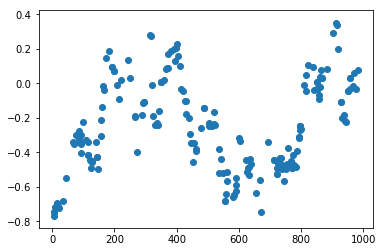

In [12]:
plt.scatter(x,subsample)
plt.show()

Use the help menu to figure out how to calculate the autocorrelation function of your lightcurve with ACF_scargle.  

In [14]:
help(ACF_scargle)

Help on function ACF_scargle in module astroML.time_series.ACF:

ACF_scargle(t, y, dy, n_omega=1024, omega_max=100)
    Compute the Auto-correlation function via Scargle's method
    
    Parameters
    ----------
    t : array_like
        times of observation.  Assumed to be in increasing order.
    y : array_like
        values of each observation.  Should be same shape as t
    dy : float or array_like
        errors in each observation.
    n_omega : int (optional)
        number of angular frequencies at which to evaluate the periodogram
        default is 2^10
    omega_max : float (optional)
        maximum value of omega at which to evaluate the periodogram
        default is 100
    
    Returns
    -------
    ACF, t : ndarrays
        The auto-correlation function and associated times



In this next example, we will explore data drawn from a gaussian process.

In [25]:
from sklearn.gaussian_process import GaussianProcess
import numpy as np

Define a covariance function as the one dimensional squared-exponential covariance function described in class.  This will be a function of x1, x2, and the bandwidth h.  Name this function covariance_squared_exponential. 

In [17]:
def covariance_squared_exponential(x1,x2,h):
    return np.exp((x1-x2)**2/(2*h**2))

Generate values for the x-axis as 1000 evenly points between 0 and 10 using numpy.linspace. Define a bandwidth of h=1.

In [32]:
x = np.linspace(0, 10, num=1000, endpoint=True, retstep=False, dtype=None)

Generate an output of your covariance_squared_exponential with x as x1, x[:,None] as x2, and h as the bandwidth.

In [33]:
covariance_matrix=np.ndarray(shape=(1000,1000))
for i in range(1000):
    for j in range(1000):
        covariance_matrix[i][j]=covariance_squared_exponential(x[i],x[j],h)
print(covariance_matrix)

[[  1.00000000e+00   1.00005010e+00   1.00020042e+00 ...,   4.24487871e+21
    4.69108100e+21   5.18470553e+21]
 [  1.00005010e+00   1.00000000e+00   1.00005010e+00 ...,   3.84150282e+21
    4.24487871e+21   4.69108100e+21]
 [  1.00020042e+00   1.00005010e+00   1.00000000e+00 ...,   3.47680667e+21
    3.84150282e+21   4.24487871e+21]
 ..., 
 [  4.24487871e+21   3.84150282e+21   3.47680667e+21 ...,   1.00000000e+00
    1.00005010e+00   1.00020042e+00]
 [  4.69108100e+21   4.24487871e+21   3.84150282e+21 ...,   1.00005010e+00
    1.00000000e+00   1.00005010e+00]
 [  5.18470553e+21   4.69108100e+21   4.24487871e+21 ...,   1.00020042e+00
    1.00005010e+00   1.00000000e+00]]


Use numpy.random.multivariate_normal to generate a numpy array of the same length as your x-axis points. Each point is centered on 0 (your mean is a 1-d array of zeros), and your covariance is the output of your covariance_squared_exponential above.

In [34]:
distribution=np.random.multivariate_normal(mean=np.zeros(1000),cov=covariance_matrix)

/Users/Ralph/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


Choose two values in your x-range as sample x values, and put in an array, x_sample_test.  Choose a function (e.g. numpy.cos) as your example function to constrain.

In [47]:
x_sample_test=np.zeros(2)
x_sample_test[0]=distribution[70]
x_sample_test[1]=distribution[550]
def f(x):
    return np.cos(x)

Define an instance of a gaussian proccess

In [57]:
gp = GaussianProcess(corr='squared_exponential', theta0=1000,
                      random_state=0)

/Users/Ralph/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)


Fit the Gaussian process to data x1[:,None], with the output of the function on your sample x values (e.g. numpy.cos(x_sample_test) ).

In [58]:
z=np.atleast_2d(x).T
gp.fit(z,f(z).ravel())

/Users/Ralph/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x1162575f0>, normalize=True,
        nugget=array(2.220446049250313e-15), optimizer='fmin_cobyla',
        random_start=1,
        random_state=<mtrand.RandomState object at 0x1162fda50>,
        regr=<function constant at 0x116257230>, storage_mode='full',
        theta0=array([[1000]]), thetaL=None, thetaU=None, verbose=False)

Predict on x1[:,None], and get the MSE values.  Plot the output function and function errors.

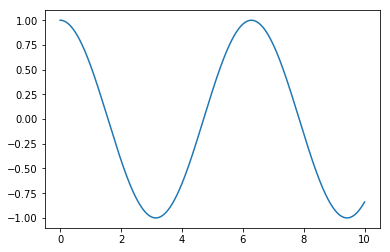

In [60]:
y_pred,MSE=gp.predict(z,eval_MSE=True)
plt.errorbar(x,y_pred,yerr=MSE)
plt.show()